<img src="https://i.stack.imgur.com/g1phN.png">

In [2]:
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew


print(pd.__version__)


meta_features_names=["nr_instances", "log_nr_instances", "nr_features",\
    "log_nr_features", "nr_classes", "nr_numerical_features", "nr_categorical_features", \
    "ratio_num_cat", "class_entropy", "missing_val", "ratio_missing_val", "max_prob", \
    "min_prob", "mean_prob","std_dev", "dataset_ratio", "symbols_sum", "symbols_mean", \
    "symbols_std_dev", "skew_min", "skew_max", "skew_mean", "skew_std_dev", "kurtosis_min",\
    "kurtosis_max", "kurtosis_mean", "kurtosis_std_dev"]

def  extractMetaFeatures(dataset):
    ### 1.Number of Instances - DONE
    nr_instances=dataset.shape[0]
    
    ### 2.Log number of Instances - DONE
    log_nr_instances=np.log(nr_instances)
    
    #### 3.Number of Features - DONE
    nr_features=dataset.shape[1]-1
    
    ### 4.Log Number of Features - DONE
    log_nr_features=np.log(nr_features)
    
    #### 5.Number of Classes - ???, it can be any column ? 
    target_variable=dataset.iloc[:,-1]
    nr_classes=target_variable.nunique()
    
    #### 6. Number of Missing Values - ??? It can be NAN, ?, e.t.c
    missing_val=0
    true_table=dataset.isin(["?"," ?"," ? ", "? " "-" " -","- ", " - "])
    miss=true_table.apply(pd.Series.value_counts)
    #print(true_table)
    #print(miss.iloc[1])
    miss_char=dataset.size - miss.iloc[0].sum()
    
    #print("Special characters ",miss_char)
    
    missing_val = sum(dataset.isna().sum()) + miss_char

    ### 7. Ratio of Missing Values - DONE
    ratio_missing_val=missing_val/dataset.size
    
    ### 8. Number of Numerical Features - ???
    nr_numerical_features = 0
    numerical = dataset.iloc[:,:-1].select_dtypes(include=['number'])
    nr_numerical_features = numerical.shape[1]
    
    ### 9. Number of Categorical Features - ???
    categorical = dataset.iloc[:,:-1].select_dtypes(exclude=['number'])
    ##nr_categorical_features=categorical.shape[1]
    nr_categorical_features=nr_features-nr_numerical_features
    
    ### 10. Ratio of Categorical to Numerical Features - DONE
    if(nr_numerical_features > 0):
        ratio_num_cat = nr_categorical_features / nr_numerical_features
        
    else:
        ratio_num_cat = 9999999999
    
    ### 11. Class Entropy - DONE
    prob_classes = []
    class_entropy = 0
    classes = target_variable.unique()
    
    for value in classes:
        prob=(sum(target_variable==value) / len(target_variable))
        if(prob == 0):
            prob = 1e-9
        
        prob_classes.append(prob)
        class_entropy= class_entropy - prob * np.log2(prob)
        
    ### 12. Maximum Class probability - DONE
    max_prob = max(prob_classes)
    
    ### 13. Minimum Class probability - DONE
    min_prob = min(prob_classes)
    
    ### 14. Mean Class probability - DONE
    
    mean_prob = np.mean(prob_classes)
    
    ### 15. Standard Deviation of Class probability - DONE
    std_dev = np.std(prob_classes)
    
    
    ### 16. Dataset Ratio - DONE
    dataset_ratio=nr_features/nr_instances
    
    
    ### 17. Symbols Sum
    symbols=[]
    if not (categorical.empty):
        for index,feature in categorical.T.iterrows():
            symbols.append(feature.nunique())

        symbols_sum=sum(symbols)
        
        ### 18. Symbols Mean
        symbols_mean=np.mean(symbols)

        ### 19. Symbols Standard Deviation
        symbols_std_dev=np.std(symbols)
        
    else:
        symbols_sum=0
        symbols_mean=0
        symbols_std_dev=0
    

    
    
    ###
    skewness_values=[]
    kurtosis_values=[]
    if not (numerical.empty):

        for index,feature in numerical.T.iterrows():
            #feature=feature.as_matrix
            skewness = skew(feature)
            kurt = kurtosis(feature)
            skewness_values.append(skewness)
            kurtosis_values.append(kurt)
        ### 20. Skewness Minimum - DONE
        skew_min = min(skewness_values)

        ### 21. Skewness Maximum - DONE
        skew_max = max(skewness_values)

        ### 22. Skewness Mean - DONE
        skew_mean = np.mean(skewness_values)

        ### 23. Skewness Standard deviation - DONE
        skew_std_dev = np.std(skewness_values)

        ### 24. Kurtosis Minimum - DONE
        kurtosis_min = min(kurtosis_values)

        ### 25. Kurtosis Maximum - DONE
        kurtosis_max = max(kurtosis_values)

        ### 26. Kurtosis Mean - DONE
        kurtosis_mean=np.mean(kurtosis_values)

        ### 27. Kurtosis Standard Deviation - DONE
        kurtosis_std_dev=np.std(kurtosis_values)
    else:
        skew_min=0
        skew_max=0
        skew_mean=0
        skew_std_dev=0
        kurtosis_min=0
        kurtosis_max=0
        kurtosis_mean=0
        kurtosis_std_dev=0
        
    
        
     
    meta_features=np.array([nr_instances,log_nr_instances,nr_features,\
    log_nr_features,nr_classes,nr_numerical_features,nr_categorical_features,ratio_num_cat,\
    class_entropy, missing_val, ratio_missing_val,max_prob,min_prob, mean_prob,\
    std_dev,dataset_ratio,symbols_sum,symbols_mean,symbols_std_dev,\
    skew_min,skew_max,skew_mean,skew_std_dev,kurtosis_min,kurtosis_max,kurtosis_mean,kurtosis_std_dev])
    
    
    return  meta_features


meta_data=[]
path ='Datasets_all' 
allFiles = glob.glob(path + "/*.csv")
for file in allFiles:
    print(file)

    dataset = pd.read_csv(file, index_col=None, header=0)
    #print(file)
    new_meta=extractMetaFeatures(dataset)
    meta_data.append(new_meta)

meta_data=np.array(meta_data)

print(meta_data)


0.24.1
Datasets_all/analcatdata_homerun.csv
Datasets_all/phptbYBGx.csv
Datasets_all/AP_Endometrium_Uterus.csv
Datasets_all/AP_Endometrium_Lung.csv
Datasets_all/dataset_186_satimage.csv
Datasets_all/dataset_23_cmc.csv
Datasets_all/dataset_105_lung-cancer.csv
Datasets_all/KDDCup99.csv
Datasets_all/AP_Uterus_Kidney.csv
Datasets_all/phpSF8oeR.csv
Datasets_all/php9HX2u8.csv
Datasets_all/dataset_35_dermatology.csv
Datasets_all/phpB0xrNj.csv
Datasets_all/mnist_784.csv


/home/salijona/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Datasets_all/phpxijhaP.csv
Datasets_all/pc1.csv
Datasets_all/hiva_agnostic.csv
Datasets_all/AP_Colon_Kidney.csv
Datasets_all/openml_phpZNNasq.csv
Datasets_all/dataset_113_primary-tumor.csv
Datasets_all/phpcB9ONH.csv
Datasets_all/covtype-normalized.csv
Datasets_all/phpO72JYX.csv
Datasets_all/dataset_34_postoperative-patient-data.csv
Datasets_all/php50jXam.csv
Datasets_all/phpBG0Qsi.csv
Datasets_all/leukemia.csv
Datasets_all/phpyrl8ZE.csv
Datasets_all/dataset_40_sonar.csv
Datasets_all/analcatdata_cyyoung9302.csv
Datasets_all/dataset_20_mfeat-pixel.csv
Datasets_all/phpOJxGL9.csv
Datasets_all/jungle_chess_2pcs_endgame_panther_lion.csv
Datasets_all/dataset_11_balance-scale.csv
Datasets_all/phpoOxxNn.csv
Datasets_all/AP_Prostate_Ovary.csv
Datasets_all/pc3.csv
Datasets_all/dataset_37_diabetes.csv
Datasets_all/phpZrCzJR.csv
Datasets_all/fri_c2_1000_10.csv
Datasets_all/phpd8EoD9.csv
Datasets_all/phpSOw1Kl.csv
Datasets_all/AP_Breast_Kidney.csv
Datasets_all/dataset_194_eucalyptus.csv
Datasets_all

In [ ]:
import pandas as pd

data = pd.read_csv("Datasets/phpp41X7N.csv")
extractMetaFeatures(data)

In [74]:
def histogram(meta_data,meta_features_names):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams['figure.figsize'] = (20, 40)
    j=0
    print(meta_data.shape)
    print(len(meta_features_names))
    for i in meta_data.T:
        text=meta_features_names[j]
        ax = plt.subplot(9,3,1+j)
        plt.xscale("log")

        plt.title('{}'.format(text))
        plt.hist(i)

        j=j+1
    plt.savefig("trial2.png")
    plt.show()
histogram(meta_data,meta_features_names)

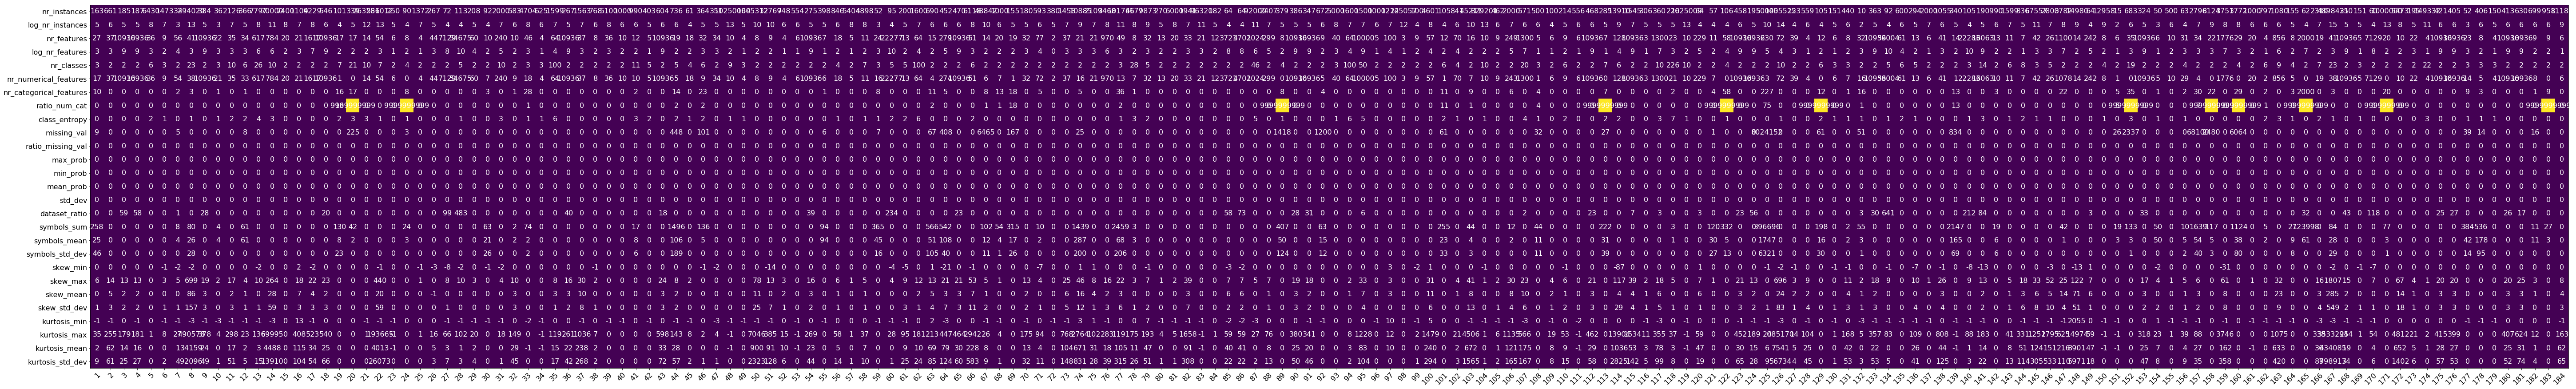

In [22]:

plt.rcParams['figure.figsize'] = (100, 40)
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots()
im = ax.imshow(meta_data.T)

dataset_info=np.arange(1, 20, 1, dtype=int)

# We want to show all ticks...
ax.set_xticks(np.arange(len(dataset_info)))
ax.set_yticks(np.arange(len(meta_features_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(dataset_info)
ax.set_yticklabels(meta_features_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(meta_features_names)):
    for j in range(len(dataset_info)):
        text = ax.text(j, i, int(meta_data[j, i]), ha="center", va="center", color="w")

ax.set_title("")
#fig.tight_layout()
plt.savefig("heatmap.png")
plt.show()